## CAPSTONE PROJECT - PROJECTING NBA SUCCESS FROM PLAYER BIOMETRICS

In [1]:
#data import and cleaning
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
df = pd.read_csv('NBA_clean.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 45 columns):
Player               200 non-null object
Position             200 non-null object
College              200 non-null object
Draft_yr             200 non-null int64
fnl_coll_rpi         200 non-null int64
Still_in_league      200 non-null int64
Tms_played_for       200 non-null int64
Age_first_yr         200 non-null int64
Draft_pick           200 non-null int64
Hght_noshoes         200 non-null float64
Hght_wtshoes         200 non-null float64
Wingspan             200 non-null float64
Standing_reach       200 non-null float64
Vert_max             200 non-null float64
Vert_maxreach        200 non-null float64
Vert_nostep          200 non-null float64
Vert_nostep_reach    200 non-null float64
Weight               200 non-null int64
Body_fat             200 non-null float64
Hand_length          200 non-null float64
Hand_width           200 non-null float64
G                    200 non-n

In [3]:
# split out by position 
Guards = df.loc[df['Position'].isin(['PG','SG'])]
Forwards = df.loc[df['Position'].isin(['SF','PF'])]
Centers = df.loc[df['Position'].isin(['C'])]

In [4]:
#X and y variables for model

# ALL PLAYERS
X_OV = df.drop(['Player','Still_in_league','College','Draft_yr','Tms_played_for','Position','G','GS','MP','PER','FG','FGA','FG_pct','three_pt',
               'three_pt_att','three_pt_pct','two_pt','two_pt_att','two_pt_pct','FT','FTA','FT_pct','ORB','DRB','TRB',
               'AST','STL','BLK','TOV','PTS'],axis=1)
y_OV = df['Still_in_league'].values

# GUARDS
X_Guards = Guards.drop(['Player','Still_in_league','College','Draft_yr','Tms_played_for','Position','G','GS','MP','PER','FG','FGA','FG_pct','three_pt',
               'three_pt_att','three_pt_pct','two_pt','two_pt_att','two_pt_pct','FT','FTA','FT_pct','ORB','DRB','TRB',
               'AST','STL','BLK','TOV','PTS'],axis=1)
y_Guards = Guards['Still_in_league'].values

# FORWARDS
X_Forwards = Forwards.drop(['Player','Still_in_league','College','Draft_yr','Tms_played_for','Position','G','GS','MP','PER','FG','FGA','FG_pct','three_pt',
               'three_pt_att','three_pt_pct','two_pt','two_pt_att','two_pt_pct','FT','FTA','FT_pct','ORB','DRB','TRB',
               'AST','STL','BLK','TOV','PTS'],axis=1)
y_Forwards = Forwards['Still_in_league'].values

# CENTERS
X_Centers = Centers.drop(['Player','Still_in_league','College','Draft_yr','Tms_played_for','Position','G','GS','MP','PER','FG','FGA','FG_pct','three_pt',
               'three_pt_att','three_pt_pct','two_pt','two_pt_att','two_pt_pct','FT','FTA','FT_pct','ORB','DRB','TRB',
               'AST','STL','BLK','TOV','PTS'],axis=1)
y_Centers = Centers['Still_in_league'].values

In [10]:
# scale data
from sklearn.preprocessing import StandardScaler
scl_obj = StandardScaler()

#scale X to make the mean 0 and unit standard deviation

# AlL PLAYERS
scl_obj.fit(X_OV) 
X_scaled_OV = scl_obj.transform(X_OV)

# GUARDS
scl_obj.fit(X_Guards) 
X_scaled_Guards = scl_obj.transform(X_Guards)

# FORWARDS
scl_obj.fit(X_Forwards) 
X_scaled_Forwards = scl_obj.transform(X_Forwards)

# CENTERS
scl_obj.fit(X_Centers) 
X_scaled_Centers = scl_obj.transform(X_Centers)
X_scaled_OV


array([[-8.90151277e-01,  1.55538513e+00,  6.71697125e-01, ...,
         1.36823771e+00, -5.89872375e-01, -3.32037211e-01],
       [-8.90151277e-01,  8.71699359e-01, -2.07056268e-01, ...,
        -1.18194472e+00,  2.10360879e+00,  6.74136155e-01],
       [-8.90151277e-01, -1.86304373e+00, -1.41534218e+00, ...,
        -3.17476101e-01, -5.89872375e-01,  3.35391122e-03],
       ...,
       [ 2.83987806e+00, -4.95672184e-01,  4.52008777e-01, ...,
         2.87651934e-01,  4.87520091e-01, -6.67428332e-01],
       [ 3.73868030e+00, -4.95672184e-01,  1.66029469e+00, ...,
         1.14758209e-01,  2.10360879e+00,  3.35726513e+00],
       [ 6.27779666e+00, -1.17935796e+00,  4.52008777e-01, ...,
         2.70816407e+00,  1.02621632e+00, -6.67428332e-01]])

## Test Linear Regression Model 
## TESTING CONFIRMED THAT WE NEED MORE DATA TO PERFORM THIS TYPE OF ANALYSIS - PARTICULARY COLLEGE STATS AND QUALITY OF COLLEGE. WE WON'T RUN UNLESS WE DECIDE TO PURSUE LATER ON

In [309]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# test/training data
X_train_LR_OV,X_test_LR_OV,y_train_LR_OV,y_test_LR_OV = train_test_split(X_scaled_OV,y_OV,test_size=0.2, random_state = 42)


# Note the difference in argument order
model = sm.OLS(y_train_LR_OV, X_train_LR_OV).fit()
predictions = model.predict(X_test_LR_OV) # make the predictions by the model

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     1.970
Date:                Mon, 12 Mar 2018   Prob (F-statistic):             0.0308
Time:                        22:48:44   Log-Likelihood:                -166.44
No. Observations:                 160   AIC:                             356.9
Df Residuals:                     148   BIC:                             393.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.0193      0.063      0.305      0.761        -0.106     0.144
x2            -0.2672      0.061     -4.356      0.000        -0.388    -0.146
x3            -0.3111      0.680     -0.458      0.648        -1.655     1.033
x4             0.4323      0.696      0.621      0.535        -0.943     1.807
x5             0.0105      0.171      0.062      0.951        -0.327     0.348
x6            -0.0111      0.081     -0.136      0.892        -0.172     0.150
x7            -0.0313      0.088     -0.354      0.724        -0.206     0.143
x8            -0.0408      0.071     -0.575      0.566        -0.181     0.099
x9            -0.0126      0.073     -0.174      0.862        -0.156     0.131
x10           -0.0201      0.091     -0.220      0.826        -0.201     0.160
x11           -0.0952      0.120     -0.797      0.427        -0.331     0.141
x12            0.0172      0.077      0.222      0.825        -0.136     0.170
x13            0.0021      0.088      0.024      0.981        -0.172     0.176
x14           -0.0047      0.071     -0.066      0.947        -0.145     0.135
==============================================================================
Omnibus:                        7.838   Durbin-Watson:                   0.778
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                3.652
Skew:                          -0.048   Prob(JB):                        0.161
Kurtosis:                       2.266   Cond. No.                     1.05e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.99e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### ALL PLAYERS

In [6]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.model_selection import train_test_split

#create a train/test split of 80%/20%
# assign static random seed =42
X_train_OV,X_test_OV,y_train_OV,y_test_OV = train_test_split(X_scaled_OV,y_OV,test_size=0.2, random_state = 42)

#fit model
logreg_OV = logreg.fit(X_train_OV,y_train_OV)

#Predict on test data set
logreg_test_OV =logreg_OV.predict(X_test_OV)

# Print Score
logreg_OV.score(X_test_OV, y_test_OV)

0.725

In [7]:
# sort and print out model coefficients
zip_vars = zip(logreg_OV.coef_.T, X_OV) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out

Draft_pick has weight of -1.4503749692444883
Vert_nostep_reach has weight of -0.3169919336540555
Standing_reach has weight of -0.29292879688206624
Vert_maxreach has weight of -0.28615576114650626
Body_fat has weight of -0.21859201175865528
Weight has weight of -0.21508740131813
Age_first_yr has weight of -0.12527927107627757
fnl_coll_rpi has weight of -0.06240150284794398
Vert_nostep has weight of -0.006165811868010986
Vert_max has weight of 0.07371606419312031
Hand_width has weight of 0.1223169141638058
Hand_length has weight of 0.15196811554305156
Hght_noshoes has weight of 0.24254967213306927
Hght_wtshoes has weight of 0.300548805117858
Wingspan has weight of 0.5725976446766041


In [8]:
#Plot the coefficients
%matplotlib inline
plt.style.use('ggplot')

weights = pd.Series(logreg_OV.coef_[0],index=X_OV.columns)
weights.plot(kind='bar')
weights.plot(figsize=(7,7))
plt.xticks(rotation=90)
plt.show()

NameError: name 'plt' is not defined

In [9]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_OV,logreg_test_OV))

             precision    recall  f1-score   support

          0       0.56      0.77      0.65        13
          1       0.86      0.70      0.78        27

avg / total       0.76      0.72      0.73        40



In [310]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test_OV, logreg_test_OV))

0.653735632183908


Confusion matrix
[[ 7  5]
 [ 8 21]]


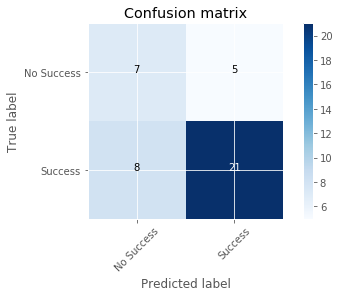

In [315]:
# Confusion matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Confusion Matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
from sklearn import metrics as mt
import matplotlib.pyplot as plt


log_conf = mt.confusion_matrix(y_test_OV,logreg_test_OV)

class_names = ['No Success', 'Success']
plot_confusion_matrix(log_conf, classes=class_names)

plt.show()




 Below is the total cost score from the Logistic Regression model. <br> **Cost Score = (7)(-1) + (5)(10) + (8)(15) + (21)(-1) = 156**

### GUARDS

In [306]:
#create a train/test split of 80%/20%
# assign static random seed =42
X_train_Guards,X_test_Guards,y_train_Guards,y_test_Guards=train_test_split(X_scaled_Guards,y_Guards,
test_size=0.2, random_state = 42)

#fit model
logreg_Guards = logreg.fit(X_train_Guards,y_train_Guards)

#Predict on test data set
logreg_Guards.predict(X_test_Guards)

#Print Score
logreg_Guards.score(X_test_Guards, y_test_Guards)

0.47368421052631576

### FORWARDS

In [307]:
#create a train/test split of 80%/20%
# assign static random seed =42
X_train_Forwards,X_test_Forwards,y_train_Forwards,y_test_Forwards = train_test_split(X_scaled_Forwards,y_Forwards,
test_size=0.2, random_state = 42)

#fit model
logreg_Forwards = logreg.fit(X_train_Forwards,y_train_Forwards)

#Predict on test data set
logreg_Forwards.predict(X_test_Forwards)

# Print score
logreg_Forwards.score(X_test_Forwards, y_test_Forwards)

0.5

### CENTERS

In [308]:
#create a train/test split of 80%/20%
# assign static random seed =42
X_train_Centers,X_test_Centers,y_train_Centers,y_test_Centers = train_test_split(X_scaled_Centers,y_Centers,
test_size=0.2, random_state = 42)

#fit model
logreg_Centers = logreg.fit(X_train_Centers,y_train_Centers)

#Predict on test data set
logreg_Centers.predict(X_test_Centers)

# Print score
logreg_Centers.score(X_test_Centers, y_test_Centers)

0.5714285714285714